In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from tensorflow.keras.datasets import mnist

In [4]:
(X_train,y_train), (X_test,y_test) = mnist.load_data()

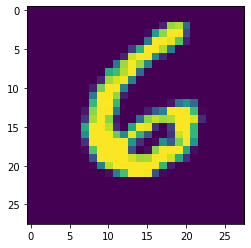

In [10]:
plt.imshow(X_train[90])

In [11]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [14]:
only_nines = X_train[y_train == 9]

In [15]:
only_nines.shape

(5949, 28, 28)

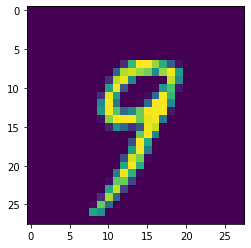

In [16]:
plt.imshow(only_nines[14])

In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Reshape,Flatten

In [18]:
discriminator = Sequential()
discriminator.add(Flatten(input_shape = [28,28]))
discriminator.add(Dense(150, activation='relu'))
discriminator.add(Dense(100, activation='relu'))
discriminator.add(Dense(1, activation='sigmoid')) 

discriminator.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [20]:
codings_size = 100

generator = Sequential()
generator.add(Dense(100, activation='relu', input_shape=[codings_size]))
generator.add(Dense(150, activation='relu'))
generator.add(Dense(784, activation='relu'))

generator.add(Reshape([28,28]))

In [22]:
GAN = Sequential([generator,discriminator])

In [23]:
discriminator.trainable = False

In [24]:
GAN.compile(loss='binary_crossentropy', optimizer ='adam')

In [25]:
batch_size = 32
data = only_nines
dataset = tf.data.Dataset.from_tensor_slices(data).shuffle(buffer_size=1000)

In [26]:
type(dataset)

tensorflow.python.data.ops.dataset_ops.ShuffleDataset

In [27]:
dataset = dataset.batch(batch_size=batch_size,drop_remainder=True).prefetch(1)

In [29]:
GAN.layers[1].summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 150)               117750    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               15100     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 265,902
Trainable params: 132,951
Non-trainable params: 132,951
_________________________________________________________________


In [31]:
generator, discriminator = GAN.layers
epochs = 1
for epoch in range(epochs):
    
    print(f"Currently on Epoch {epoch+1}")
    i = 1
    
    for X_batch in dataset:
        i += 1
        
        if i%100==0:
            print(f"\t Currently on batch number {i} of {len(data)//batch_size}")
            
        # DISCRIMINATOR
        
        noise = tf.random.normal(shape=[batch_size,codings_size])
        
        gen_images = generator(noise)
        
        X_fakevsreal = tf.concat([gen_images, tf.dtypes.cast(X_batch,tf.float32)],axis =0)
        
        y1 = tf.constant([[0.0]]*batch_size + [[1.0]]*batch_size)
        
        discriminator.trainable = True
        
        discriminator.train_on_batch(X_fakevsreal,y1)
        
        
        #GENERATOR
        
        noise = tf.random.normal(shape=[batch_size,codings_size])
        y2 = tf.constant([[1.0]]*batch_size)
        discriminator.trainable = False
        GAN.train_on_batch(noise,y2)

Currently on Epoch 1
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
	 Currently on batch number 100 of 185


In [32]:
noise = tf.random.normal(shape=[10,codings_size])

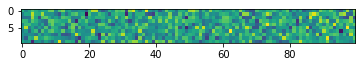

In [34]:
plt.imshow(noise)

In [35]:
images = generator(noise)

In [37]:
images.shape

TensorShape([10, 28, 28])

In [39]:
images[0]

<tf.Tensor: id=73718, shape=(28, 28), dtype=float32, numpy=
array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.

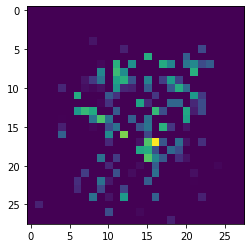

In [40]:
plt.imshow(images[0])

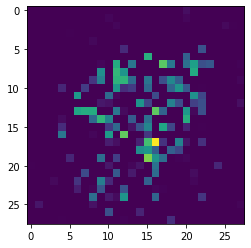

In [45]:
plt.imshow(images[1]) #MODE COLLAPSE 